In [1]:
import pandas, numpy
import sklearn, sklearn.decomposition, sklearn.preprocessing

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
tpm_file = '/home/adrian/projects/vigur/results/sequencing/tpm/DESeq2_TPM_values.tsv'

In [3]:
df = pandas.read_csv(tpm_file, sep='\t', index_col=0)
print(df.shape)
df.head()

(40320, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,33.913270,36.925924,34.300713,34.066671,39.539143,35.387464,37.382210,37.271017,44.412056,36.546054,...,38.878165,34.539854,36.341524,36.358163,35.662062,39.354423,36.897123,40.268850,40.243493,39.279878
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.070305,0.000000,0.042654,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,57.479592,60.383467,70.469104,76.421934,81.956683,80.662585,75.102084,75.548661,85.646220,76.686500,...,49.313600,74.750882,73.621733,88.938917,84.652970,78.607037,77.642204,78.861113,74.648598,56.894679
ENSG00000000457,4.152165,3.688847,5.083191,5.851081,5.013459,4.998895,4.943423,5.759294,5.797407,4.996733,...,3.751108,4.686774,4.408532,4.283488,5.221377,4.081310,4.327263,4.538531,4.417790,3.793313
ENSG00000000460,11.709865,11.232057,10.623214,10.214623,10.217977,10.546670,9.608664,8.750641,9.234168,8.759522,...,4.732061,4.222485,3.397340,3.719525,3.375133,3.705756,3.933664,3.627546,3.490585,5.726682


In [4]:
expressed_genes = df[df.max(axis=1) > 10]
print(expressed_genes.shape)
expressed_genes.head()

(10789, 96)


,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,33.913270,36.925924,34.300713,34.066671,39.539143,35.387464,37.382210,37.271017,44.412056,36.546054,...,38.878165,34.539854,36.341524,36.358163,35.662062,39.354423,36.897123,40.268850,40.243493,39.279878
ENSG00000000419,57.479592,60.383467,70.469104,76.421934,81.956683,80.662585,75.102084,75.548661,85.646220,76.686500,...,49.313600,74.750882,73.621733,88.938917,84.652970,78.607037,77.642204,78.861113,74.648598,56.894679
ENSG00000000460,11.709865,11.232057,10.623214,10.214623,10.217977,10.546670,9.608664,8.750641,9.234168,8.759522,...,4.732061,4.222485,3.397340,3.719525,3.375133,3.705756,3.933664,3.627546,3.490585,5.726682
ENSG00000000971,3.919836,3.961571,4.855258,6.049547,5.878480,4.963093,4.897367,5.902250,6.136439,4.665596,...,6.025192,6.169093,6.043438,6.312153,7.099294,6.737880,5.692907,5.491059,6.027195,3.319287
ENSG00000001036,98.749177,93.369186,97.093841,99.330942,94.472534,95.118067,92.213446,92.024123,85.314419,86.552993,...,76.978254,74.919837,77.801522,77.371515,80.343355,72.891825,80.193461,70.433779,79.979021,64.439060


In [5]:
log2_expressed_genes = numpy.log2(expressed_genes+1)
log2_expressed_genes.head()

,072_159,072_160,072_161,072_162,072_163,072_164,072_165,072_166,072_167,072_168,...,073_73,073_74,073_75,073_76,073_77,073_78,073_79,073_80,073_81,073_82
ENSG00000000003,5.125704,5.245112,5.141625,5.132029,5.341244,5.185370,5.262366,5.258180,5.505003,5.230589,...,5.317527,5.151366,5.222709,5.223352,5.196216,5.334655,5.244016,5.366981,5.366095,5.331987
ENSG00000000419,5.869861,5.939778,6.159248,6.274670,6.374286,6.351603,6.249864,6.258305,6.437065,6.279592,...,5.652877,6.243191,6.221524,6.490874,6.420431,6.314824,6.297232,6.319421,6.241241,5.855359
ENSG00000000460,3.667877,3.612595,3.538937,3.487309,3.487741,3.529405,3.407171,3.285497,3.355322,3.286811,...,2.519054,2.384736,2.136631,2.238642,2.129327,2.234427,2.302659,2.210247,2.166903,2.749895
ENSG00000000971,2.298610,2.310797,2.549733,2.817531,2.782090,2.576061,2.560071,2.787067,2.835204,2.502228,...,2.812538,2.841791,2.816280,2.870296,3.017796,2.951938,2.742633,2.698454,2.812949,2.110793
ENSG00000001036,6.640233,6.560244,6.616091,6.648623,6.577014,6.586736,6.542466,6.539533,6.431530,6.452085,...,6.285000,6.246405,6.300152,6.292257,6.345953,6.207343,6.343292,6.158535,6.339476,6.032080


16.183837335339444


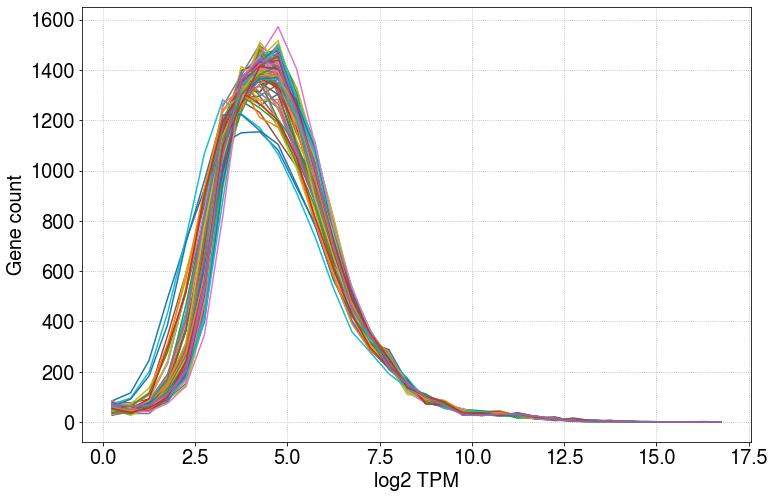

In [6]:
absolute_max = 0
working_samples = log2_expressed_genes.columns.to_list()
working_samples.remove('073_39')

for sample in working_samples:
    
    log2TPM = log2_expressed_genes.loc[:, sample]
    if max(log2TPM) > absolute_max:
        absolute_max = max(log2TPM)
        
    hist, bin_edges = numpy.histogram(log2TPM, bins=17*2, range=(0, 17))
    
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    
    matplotlib.pyplot.plot(x, hist)
    
matplotlib.pyplot.xlabel('log2 TPM')
matplotlib.pyplot.ylabel('Gene count')
matplotlib.pyplot.grid(ls=':')
print(absolute_max)

In [7]:
pca_input = log2_expressed_genes.transpose()
pca_input.drop('073_39', inplace=True)

pca = sklearn.decomposition.PCA(n_components=2)
x = sklearn.preprocessing.StandardScaler().fit_transform(pca_input)
principalComponents = pca.fit_transform(x)

print(principalComponents.shape)
print(pca.explained_variance_ratio_)

(95, 2)
[0.42509322 0.14907399]


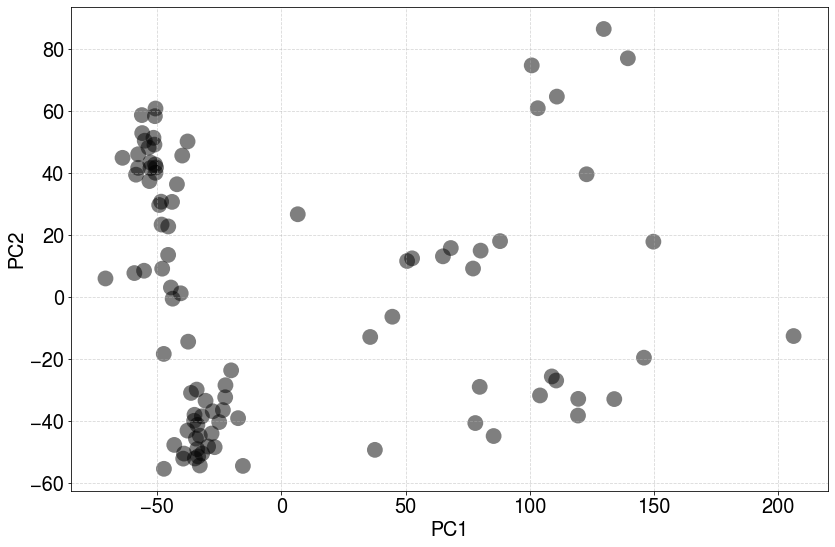

In [8]:
the_color = 'black'
for i in range(len(working_samples)):
              
    matplotlib.pyplot.scatter(principalComponents[i, 0], principalComponents[i, 1], c=the_color, s=250, alpha=0.5, edgecolors='none', marker='o')

matplotlib.pyplot.xlabel('PC1')
matplotlib.pyplot.ylabel('PC2')
matplotlib.pyplot.grid(alpha=0.5, ls='--')
matplotlib.pyplot.tight_layout()
